# Select Right Threshold Using ROC Curve

In [46]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Create some data
from sklearn.datasets import make_classification

In [47]:
# Create Datasets from sklearn
x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=2)

In [48]:
#Print some records
x[1:10]

array([[-0.98305894, -0.60682679, -0.74557431,  1.40646699, -0.77240186,
        -0.47837427, -0.75577778,  0.18741431, -1.06151231, -0.37566381,
         0.45094785,  0.20152685, -0.28555251,  1.60288172,  0.35097063,
         0.76702381,  2.18393693, -0.49701479,  0.97834573,  0.72410767],
       [ 0.21816196, -1.57542668,  1.66987333,  0.44233996, -1.86644734,
         1.3487893 , -0.33784457,  1.8595533 ,  1.41496857,  0.48778768,
         0.86285933,  0.45697243, -2.37625498, -0.05152073,  0.84730133,
         0.00865502,  0.48675577, -1.53196596, -1.34384834,  0.79413943],
       [-0.28250283, -0.13052253, -0.25223298, -1.40594944, -1.79388057,
         0.16543242, -0.99675135,  1.42752784, -0.43706772,  1.11863949,
        -0.38309734,  1.92275523,  0.53335774, -0.73839574,  0.87355751,
         0.18270822, -1.23381639,  1.24874298, -1.86530108, -0.06317541],
       [ 1.23847156,  0.56704675, -0.83768781,  0.68859855, -0.74504305,
        -0.66872176, -0.85218997,  0.71771227, -

In [50]:
#print rows and Cols
x.shape

(2000, 20)

In [5]:
y.shape

(2000,)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Splitting Data

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Using Random Forests for the Training and Predictionn

In [8]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
y_train_pred=model.predict(x_train)

In [10]:
y_train_pred

array([0, 1, 1, ..., 1, 1, 1])

In [11]:
y_test_pred=model.predict(x_test)
y_test

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,

# Find the Probabilities Used in Each Classification

In [12]:
# training Probabilities
y_tr_pred=model.predict_proba(x_train)
y_tr_pred

array([[0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [13]:
y_tr_pred

array([[0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [14]:
# Testinng Probabilities
y_tst_pred=model.predict_proba(x_test)
y_tst_pred

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ]])

# Printing Train and Test Probabilities

In [15]:
import pandas as pd
test_proba=pd.DataFrame(data=y_tst_pred,columns=["A","B"], index=[i for i in range(len(y_tst_pred))])

In [16]:
test_proba

,A,B
0,0.00,1.00
1,1.00,0.00
2,0.98,0.02
3,1.00,0.00
4,0.00,1.00
...,...,...
595,0.00,1.00
596,0.02,0.98
597,0.99,0.01
598,1.00,0.00


In [17]:
train_proba=pd.DataFrame(data=y_tr_pred,columns=["A","B"], index=[i for i in range(len(y_tr_pred))])
train_proba

,A,B
0,0.99,0.01
1,0.00,1.00
2,0.00,1.00
3,0.00,1.00
4,1.00,0.00
...,...,...
1395,0.00,1.00
1396,0.01,0.99
1397,0.00,1.00
1398,0.00,1.00


In [18]:
print(f" The train ROC-AUC score is :{roc_auc_score(y_train,y_tr_pred[:,1])}")
print(f" The test ROC-AUC score is :{roc_auc_score(y_test,y_tst_pred[:,1])}")

 The train ROC-AUC score is :1.0
 The test ROC-AUC score is :0.9971988795518207


# Use Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr_classifier=LogisticRegression()
lr_classifier.fit(x_train,y_train)

LogisticRegression()

In [20]:
print(f" The LR train ROC-AUC score is  :{roc_auc_score(y_train,lr_classifier.predict_proba(x_train)[:,1])}")
print(f" The LR test ROC-AUC score is :{roc_auc_score(y_test,lr_classifier.predict_proba(x_test)[:,1])}")

 The LR train ROC-AUC score is  :0.9987998799879988
 The LR test ROC-AUC score is :0.9992330265439509


# Use Adaboost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
adb_classifier=AdaBoostClassifier()
adb_classifier.fit(x_train,y_train)

AdaBoostClassifier()

In [22]:
print(f" The Adaboost train ROC-AUC score is  :{roc_auc_score(y_train,adb_classifier.predict_proba(x_train)[:,1])}")
print(f" The Adaboost test ROC-AUC score is :{roc_auc_score(y_test,adb_classifier.predict_proba(x_test)[:,1])}")

 The Adaboost train ROC-AUC score is  :1.0
 The Adaboost test ROC-AUC score is :0.9995998399359743


# KNNCLassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
print(f" The KNN train ROC-AUC score is  :{roc_auc_score(y_train,knn_classifier.predict_proba(x_train)[:,1])}")
print(f" The KNN test ROC-AUC score is :{roc_auc_score(y_test,knn_classifier.predict_proba(x_test)[:,1])}")

 The KNN train ROC-AUC score is  :0.999294827441928
 The KNN test ROC-AUC score is :0.9959650526877417


In [28]:
pred=[]
for model in [model,lr_classifier,adb_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9989106753812635


In [29]:
pred

[0      1.00
 1      0.00
 2      0.02
 3      0.00
 4      1.00
        ... 
 595    1.00
 596    0.98
 597    0.01
 598    0.00
 599    1.00
 Length: 600, dtype: float64,
 0      0.997650
 1      0.001664
 2      0.000209
 3      0.003007
 4      0.988703
          ...   
 595    0.979561
 596    0.995288
 597    0.000179
 598    0.000156
 599    0.994109
 Length: 600, dtype: float64,
 0      0.811459
 1      0.342385
 2      0.371332
 3      0.341821
 4      0.854400
          ...   
 595    0.781042
 596    0.923007
 597    0.297353
 598    0.323368
 599    0.733645
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.2
 3      0.0
 4      1.0
       ... 
 595    1.0
 596    1.0
 597    0.0
 598    0.0
 599    1.0
 Length: 600, dtype: float64]

In [31]:
len(pred)

4

In [35]:
df=pd.concat(pred,axis=1)

In [36]:
df.head()

,0,1,2,3
0,1.00,0.997650,0.811459,1.0
1,0.00,0.001664,0.342385,0.0
2,0.02,0.000209,0.371332,0.2
3,0.00,0.003007,0.341821,0.0
4,1.00,0.988703,0.854400,1.0


In [38]:
df.rename(columns={0:"RF",1:"LR",2:"ADB",3:"KNN"}, inplace=True)

In [39]:
df.head()

,RF,LR,ADB,KNN
0,1.00,0.997650,0.811459,1.0
1,0.00,0.001664,0.342385,0.0
2,0.02,0.000209,0.371332,0.2
3,0.00,0.003007,0.341821,0.0
4,1.00,0.988703,0.854400,1.0


In [40]:
final_prediction  # This is as a result of the mean across four columns in the pd.concat(pred,axis=1)

0      0.952277
1      0.086012
2      0.147885
3      0.086207
4      0.960776
         ...   
595    0.940151
596    0.974574
597    0.076883
598    0.080881
599    0.931938
Length: 600, dtype: float64

# Calculate the ROC Curve for All Models Combined

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.98748273, 0.98748273, 0.77405488, 0.76973547, 0.72612141,
       0.0897051 , 0.08969776, 0.05726306])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
4,0.726121,0.995000
3,0.769735,0.993333
2,0.774055,0.991667
5,0.089705,0.841667
6,0.089698,0.840000


In [44]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve Display')
    plt.legend()
    plt.show()

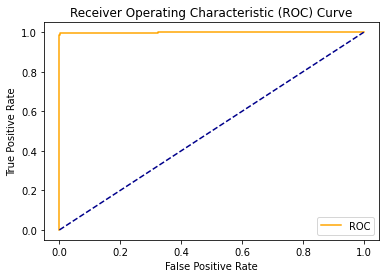

In [45]:
plot_roc_curve(fpr,tpr)